In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import datetime
import matplotlib.dates as mdates

In [137]:
folder_path = '/Users/kassiewang/Downloads/csv/hashtags/'
all_files = glob.glob(os.path.join(folder_path, "*.csv"))

dfs = []

for name in all_files:
    df = pd.read_csv(name)
    df['country'] = str(name[name.rfind('/')+1:-4])
    dfs.append(df)

hashtags = pd.concat(dfs)

In [138]:
#Getting list of economic terms
f = open('/Users/kassiewang/Desktop/econvocab.txt', 'r')
lines = f.readlines()
allterms = ''
for i in range(len(lines)):
    line = lines[i].strip()
    if i != 0:
        allterms = allterms + '|' + line
    else:
        allterms = line

feature = hashtags['text'].str.contains(allterms, case = False, na = False, regex = True)

In [157]:
hashtags['contain_econ'] = feature
hashtags['contain_econ'] = hashtags['contain_econ'].astype(int)
hashtags['date'] = hashtags['date'].str[:10]
hashtags['date'] = pd.to_datetime(hashtags['date'], errors='coerce')

AttributeError: Can only use .str accessor with string values!

In [158]:
hashtags['country']= hashtags['country'].replace('uk', "UK")
hashtags['country']= hashtags['country'].replace('italy', "Italy")
hashtags['country']= hashtags['country'].replace('eastern_us', "US")
hashtags['country']= hashtags['country'].replace('germany', "Germany")
hashtags['country']= hashtags['country'].replace('france', "France")
hashtags['country']= hashtags['country'].replace('spain', "Spain")
hashtags['country']= hashtags['country'].replace('switzerland', "Switzerland")
hashtags['country']= hashtags['country'].replace('south_korea', "South Korea")
hashtags['country']= hashtags['country'].replace('iran', "Iran")
hashtags['country']= hashtags['country'].replace('western_us', "US")

In [185]:
filepath = "/Users/kassiewang/Downloads/csv/county_coronavirus_cases.csv"
rawcorona = pd.read_csv(filepath, error_bad_lines=False)
rawcorona['Country.Region']= rawcorona['Country.Region'].replace('Mainland China', "China")

countries = ['US', 'Italy', 'Germany', 'Switzerland', 'France', 'Iran', 'Spain', 'UK', 'China', 'South Korea']
countriesstr = '|'.join(countries)

cleancorona = rawcorona[rawcorona['Country.Region'].str.contains(countriesstr, case = True, regex = True)]
cleancorona['ObservationDate'] = pd.to_datetime(cleancorona['ObservationDate'])

b'Skipping line 3: expected 5 fields, saw 6\nSkipping line 276: expected 5 fields, saw 6\nSkipping line 277: expected 5 fields, saw 6\nSkipping line 278: expected 5 fields, saw 6\nSkipping line 279: expected 5 fields, saw 6\nSkipping line 1193: expected 5 fields, saw 6\nSkipping line 1194: expected 5 fields, saw 6\nSkipping line 1195: expected 5 fields, saw 6\nSkipping line 1196: expected 5 fields, saw 6\nSkipping line 1197: expected 5 fields, saw 6\n'
/Users/kassiewang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [191]:
cleancorona['Country.Region'].unique()

array(['France', 'Germany', 'Iran', 'Italy', 'China', 'South Korea',
       'Spain', 'Switzerland', 'UK', 'US'], dtype=object)

In [161]:
#Plotting just the tweets
def sum_plot(country_name, output):
    
    
    
    
for i in range(len(countries)):
    





us_tweets = hashtags[hashtags['country'] == 'US']
uk_tweets = hashtags[hashtags['country'] == 'UK']
italy_tweets = hashtags[hashtags['country'] == 'Italy']
germany_tweets = hashtags[hashtags['country'] == 'Germany']
switzerland_tweets = hashtags[hashtags['country'] == 'Switzerland']
france_tweets = hashtags[hashtags['country'] == 'France']
iran_tweets = hashtags[hashtags['country'] == 'Iran']
spain_tweets = hashtags[hashtags['country'] == 'Spain']
china_tweets = hashtags[hashtags['country'] == 'China']
korea_tweets = hashtags[hashtags['country'] == 'Korea']

In [162]:
#Plotting just the corona
us_corona = cleancorona[cleancorona['Country.Region'] == 'US']
uk_corona = cleancorona[cleancorona['Country.Region'] == 'UK']
italy_corona = cleancorona[cleancorona['Country.Region'] == 'Italy']
germany_corona = cleancorona[cleancorona['Country.Region'] == 'Germany']
switzerland_corona = cleancorona[cleancorona['Country.Region'] == 'Switzerland']
france_corona = cleancorona[cleancorona['Country.Region'] == 'France']
iran_corona = cleancorona[cleancorona['Country.Region'] == 'Iran']
spain_corona = cleancorona[cleancorona['Country.Region'] == 'Spain']
china_corona = cleancorona[cleancorona['Country.Region'] == 'Mainland China']
korea_corona = cleancorona[cleancorona['Country.Region'] == 'Korea']

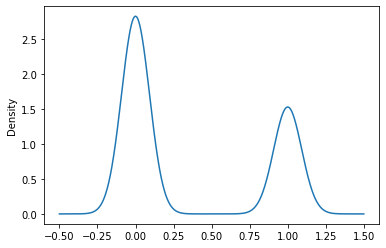

In [164]:
us_tweets['contain_econ'].plot(kind='kde')

In [180]:
plotting_us = us_tweets[['date', 'contain_econ']]
plotting_us['date'].max()

Timestamp('2020-03-24 00:00:00')

In [183]:

x = [datetime.datetime.now() + datetime.timedelta(days=i) for i in range(10)]
pyplot.plot(x,plotting_us[1])
pyplot.gcf().autofmt_xdate()
pyplot.show()

#dates = mdates.date2num(plotting_us[0])
#plot_date(dates, plotting_us[1])

#pl_data = mdates.epoch2num(plotting_us)
#fig, ax = plt.subplots(1,1)
#locator = mdates.AutoDateLocator()
#ax.xaxis.set_major_locator(locator)
#ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(locator))

#plt.show()

KeyError: 1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ec69110>]],
      dtype=object)

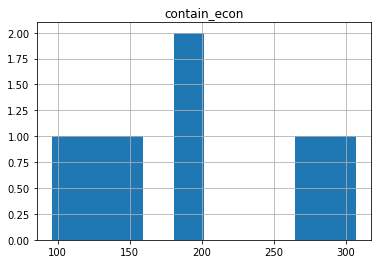

In [193]:
newone = plotting_us.groupby(['date'],as_index=False).agg({'contain_econ': 'sum'})


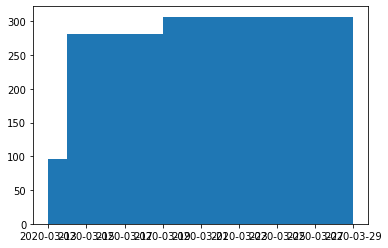

In [204]:
ax = plt.subplot(111)
ax.bar(newone['date'], newone['contain_econ'], width=10)
ax.xaxis_date()

plt.show()
